# Assignment7

# Salary Discrimination

The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

# Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best R2 score.
3. Report whether sex is a factor in salary.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [8]:
df = pd.read_fwf("salary.txt", header=None,
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [9]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [10]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [12]:
df.shape

(52, 6)

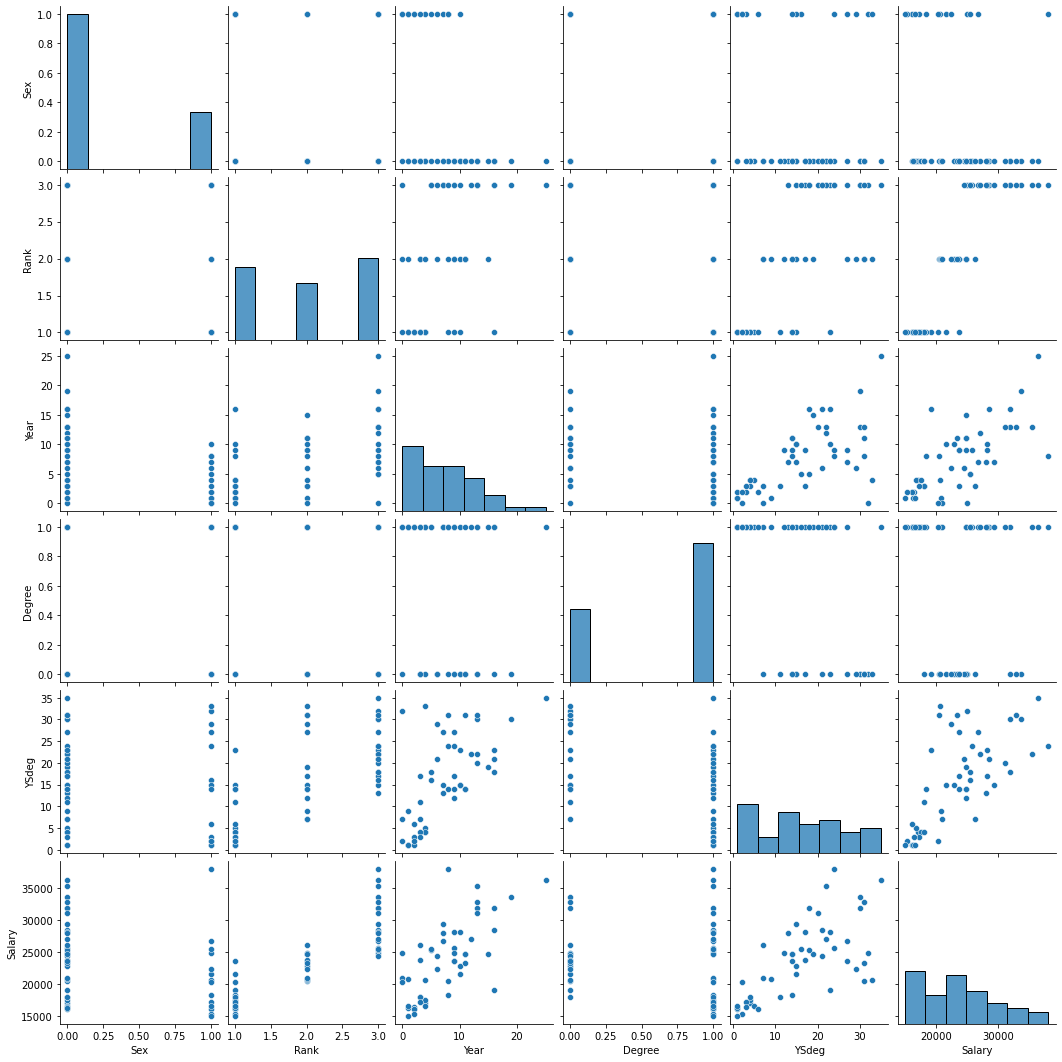

In [13]:
import seaborn as sns
sns.pairplot(data=df)

In [15]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [16]:
x=df.drop("Salary", axis='columns')
y=df["Salary"]

In [30]:
# split the training and testing data
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)

In [31]:
from sklearn.linear_model import LinearRegression 
mlr = LinearRegression()  
mlr.fit(x_train, y_train)
test_data_pred=mlr.predict(x_test)
from sklearn import metrics
error_score=metrics.r2_score(y_train,train_data_pred)
print(error_score)

0.8416559098711706


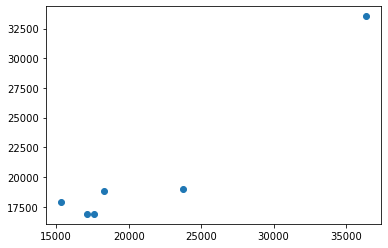

In [32]:
plt.scatter(y_test,test_data_pred)

In [33]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': test_data_pred})
mlr_diff.head()  

,Actual value,Predicted value
37,17095,16893.946430
36,18304,18844.163520
32,23713,19016.023912
39,17600,16893.946430
47,15350,17910.967271


2. Find the selection of columns with the best R2 score.

In [35]:
coeff_df = pd.DataFrame(mlr.coef_,["Sex", "Rank", "Year","Degree",'YSdeg'], columns=['Coefficient'])
y_pred = mlr.predict(x_test)
coeff_df

,Coefficient
Sex,1620.454759
Rank,5885.541052
Year,447.901209
Degree,-1344.413941
YSdeg,-146.184251


since the coeffecient value of degree and YSdeg have is negative,we can conclude that sex, Rank, Year are the best columns  

3. Report whether sex is a factor in salary.

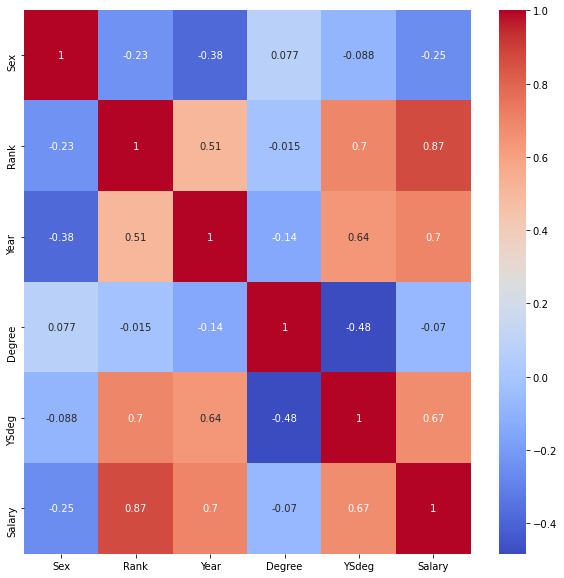

In [37]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="coolwarm")

From above pair plots and correlation points, we can conclude that sex is not a factor or a bad factor to predict the salary.  